In [1]:
import pandas as pd

# Load the dataset from the CSV file
data = pd.read_csv('spam_dataset.csv')

# Print the first few rows to check if the data is loaded correctly
print(data.head())


                                     message_content  is_spam
0  Hello Lonnie,\n\nJust wanted to touch base reg...        0
1  Congratulations, you've won a prize! Call us n...        1
2  You have been pre-approved for a credit card w...        1
3  Limited time offer, act now! Only a few spots ...        1
4  Your loan has been approved! Transfer funds to...        1


In [2]:
print(data.isnull().sum())

message_content    0
is_spam            0
dtype: int64


In [4]:
# Features are the 'message_content' column
X = data['message_content']  

# Labels are the 'is_spam' column
y = data['is_spam']

In [5]:
import re

# Convert the text to lowercase
X = X.str.lower()

# Remove special characters and numbers using regular expressions
X = X.apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tokenize the text (split the text into individual words)
X = X.apply(lambda x: x.split())

# Print the first few preprocessed text entries to see the result
print(X.head())

0    [hello, lonnie, just, wanted, to, touch, base,...
1    [congratulations, youve, won, a, prize, call, ...
2    [you, have, been, preapproved, for, a, credit,...
3    [limited, time, offer, act, now, only, a, few,...
4    [your, loan, has, been, approved, transfer, fu...
Name: message_content, dtype: object


In [3]:
import pandas as pd


In [4]:
import pandas as pd  # Import pandas library

# Load the dataset from the CSV file
data = pd.read_csv('spam_dataset.csv')  # Ensure this matches the actual file name and path

# Print the first few rows to check if the data is loaded correctly
print(data.head())


                                     message_content  is_spam
0  Hello Lonnie,\n\nJust wanted to touch base reg...        0
1  Congratulations, you've won a prize! Call us n...        1
2  You have been pre-approved for a credit card w...        1
3  Limited time offer, act now! Only a few spots ...        1
4  Your loan has been approved! Transfer funds to...        1


In [5]:
print(data.isnull().sum())  


message_content    0
is_spam            0
dtype: int64


In [6]:
import re

# Convert the text to lowercase
X = data['message_content'].str.lower()

# Remove special characters and numbers using regular expressions
X = X.apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tokenize the text (split the text into individual words)
X = X.apply(lambda x: x.split())

# Print the first few preprocessed text entries to see the result
print(X.head())


0    [hello, lonnie, just, wanted, to, touch, base,...
1    [congratulations, youve, won, a, prize, call, ...
2    [you, have, been, preapproved, for, a, credit,...
3    [limited, time, offer, act, now, only, a, few,...
4    [your, loan, has, been, approved, transfer, fu...
Name: message_content, dtype: object


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the 'is_spam' column
y = encoder.fit_transform(data['is_spam'])

# Print the first few encoded labels
print(y[:5])  # Display the first 5 encoded labels


[0 1 1 1 1]


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'message_content' column to create the feature matrix X
X = vectorizer.fit_transform(data['message_content'])

# Print the shape of the resulting feature matrix (X)
print(X.shape)


(1000, 1790)


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (800, 1790)
Testing set shape: (200, 1790)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model using the training data
model.fit(X_train, y_train)

# Evaluate the model using the testing data
accuracy = model.score(X_test, y_test)

# Print the model's accuracy
print(f"Model accuracy: {accuracy:.4f}")


Model accuracy: 1.0000


In [12]:
# Example new message
new_message = ["Congratulations, you’ve won a free trip! Call us now to claim your prize!"]

# Preprocess the new message (same preprocessing steps as above)
new_message_processed = new_message[0].lower()  # Convert to lowercase
new_message_processed = re.sub(r'[^a-z\s]', '', new_message_processed)  # Remove special characters and numbers
new_message_processed = new_message_processed.split()  # Tokenize (split the message into words)

# Convert to the feature matrix using the same vectorizer
X_new = vectorizer.transform([' '.join(new_message_processed)])

# Predict using the trained model
prediction = model.predict(X_new)

# Print the prediction (1 for spam, 0 for not spam)
print(f"Prediction for the new message: {'Spam' if prediction[0] == 1 else 'Not Spam'}")


Prediction for the new message: Spam


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Evaluate models using confusion matrix and classification report
print("Random Forest:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print("Naive Bayes:")
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

print("SVM:")
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

print("KNN:")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


Random Forest:
[[ 99   0]
 [  0 101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Naive Bayes:
[[ 99   0]
 [  0 101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

SVM:
[[ 99   0]
 [  0 101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00   

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000)

# Fit the model using the training data
model_logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
# Assume model_logreg is your trained Logistic Regression model and X_test, y_test are your test sets
y_pred_logreg = model_logreg.predict(X_test)

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Performance Metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
false_positive_rate_logreg = cm_logreg[0][1] / (cm_logreg[0][1] + cm_logreg[1][1])  # False Positive Rate
g_score_logreg = (2 * precision_logreg * recall_logreg) / (precision_logreg + recall_logreg)  # G Score

# Print Confusion Matrix and Metrics
print(f"Confusion Matrix for Logistic Regression:\n{cm_logreg}")
print(f"\nPerformance Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")
print(f"False Positive Rate: {false_positive_rate_logreg:.4f}")
print(f"G Score: {g_score_logreg:.4f}")

# Visualizing the Confusion Matrix with a Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

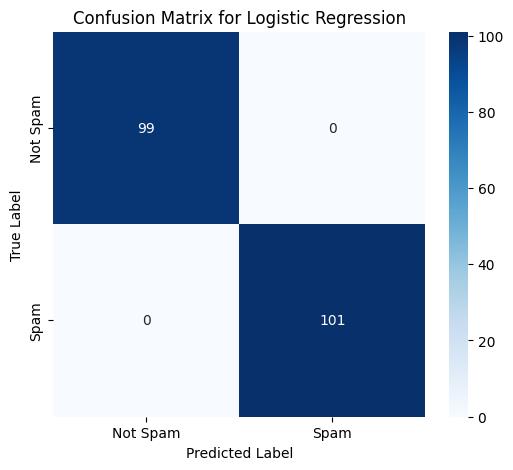

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
False Positive Rate: 0.0000
G-Score: 1.0000


In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming model_logreg is your trained Logistic Regression model and X_test, y_test are your test sets
y_pred_logreg = model_logreg.predict(X_test)

# Generate confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

# False positive rate
false_positive_rate = cm_logreg[0][1] / (cm_logreg[0][0] + cm_logreg[0][1])

# G-Score (or Matthews correlation coefficient)
from sklearn.metrics import matthews_corrcoef
g_score = matthews_corrcoef(y_test, y_pred_logreg)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"G-Score: {g_score:.4f}")


Confusion Matrix for Random Forest:
[[ 99   0]
 [  0 101]]
Performance Metrics for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



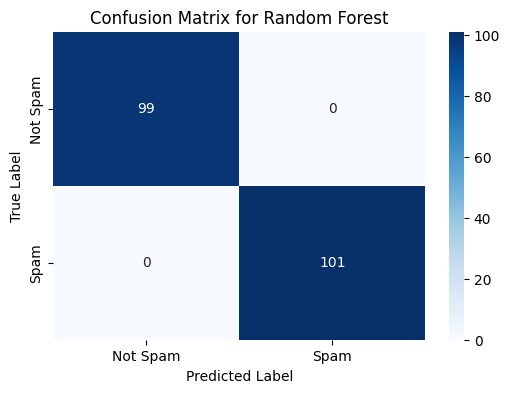

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
False Positive Rate: 0.0000
G-Score: 1.0000


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate performance metrics
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Print confusion matrix and performance metrics
print(f"Confusion Matrix for Random Forest:\n{cm_rf}")
print(f"Performance Metrics for Random Forest:\n{classification_report(y_test, y_pred_rf)}")

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print accuracy, precision, recall, f1-score, false positive rate, and G-score
accuracy = report_rf['accuracy']
precision = report_rf['macro avg']['precision']
recall = report_rf['macro avg']['recall']
f1_score = report_rf['macro avg']['f1-score']
false_positive_rate = cm_rf[0][1] / (cm_rf[0][1] + cm_rf[0][0])  # FPR = FP / (FP + TN)
g_score = (2 * precision * recall) / (precision + recall)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"G-Score: {g_score:.4f}")


In [27]:
# Example new message
new_message = ["Congratulations, you've won a free trip! Call us now to claim your prize!"]

# Preprocess the new message (same preprocessing steps as above)
new_message_processed = new_message[0].lower()  # Convert to lowercase
new_message_processed = re.sub(r'[^a-z\s]', '', new_message_processed)  # Remove special characters and numbers
new_message_processed = new_message_processed.split()  # Tokenize (split the message into words)

# Join the words back into a string
new_message_processed = ' '.join(new_message_processed)

# Convert to the feature matrix using the same vectorizer
X_new = vectorizer.transform([new_message_processed])  # Notice the extra list brackets

# Convert sparse matrix to dense format
X_new_dense = X_new.toarray()

# Predict using the trained model
prediction = model.predict(X_new_dense)

# Print the prediction (1 for spam, 0 for not spam)
print(f"Prediction for the new message: {'Spam' if prediction[0] == 1 else 'Not Spam'}")


Prediction for the new message: Spam


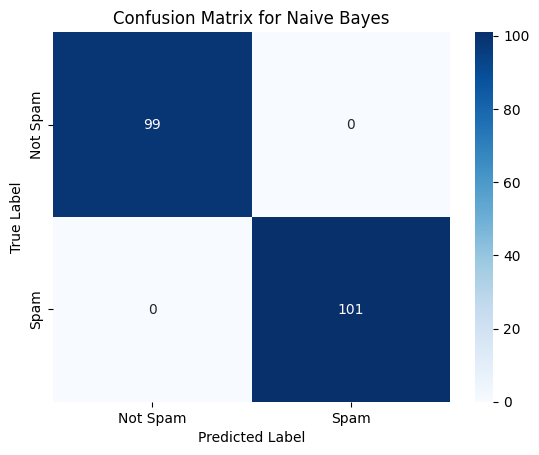

Performance Metrics for Naive Bayes:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
False Positive Rate: nan
G-Score: 1.0000


C:\Users\farei\AppData\Local\Temp\ipykernel_3340\1888292080.py:28: RuntimeWarning: invalid value encountered in scalar divide
  false_positive_rate = FP / (FP + TN)


In [28]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming model_nb is your trained Naive Bayes model
# and X_test and y_test are your test data features and labels

# Predicting the labels for the test set
y_pred_nb = model_nb.predict(X_test)

# Generating the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Displaying the confusion matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

# Calculate False Positive Rate (FPR) = FP / (FP + TN)
FP = cm_nb[0][1]
TN = cm_nb[1][0]
false_positive_rate = FP / (FP + TN)

# G-Score = (2 * Precision * Recall) / (Precision + Recall)
g_score = (2 * precision * recall) / (precision + recall)

# Printing the metrics
print("Performance Metrics for Naive Bayes:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"G-Score: {g_score:.4f}")


In [29]:
# Calculate False Positive Rate (FPR) = FP / (FP + TN)
FP = cm_nb[0][1]
TN = cm_nb[1][0]

# Avoid division by zero
if FP + TN == 0:
    false_positive_rate = 0.0
else:
    false_positive_rate = FP / (FP + TN)

# Calculate G-Score
g_score = (2 * precision * recall) / (precision + recall)

# Printing the metrics
print("Performance Metrics for Naive Bayes:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"G-Score: {g_score:.4f}")


Performance Metrics for Naive Bayes:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
False Positive Rate: 0.0000
G-Score: 1.0000


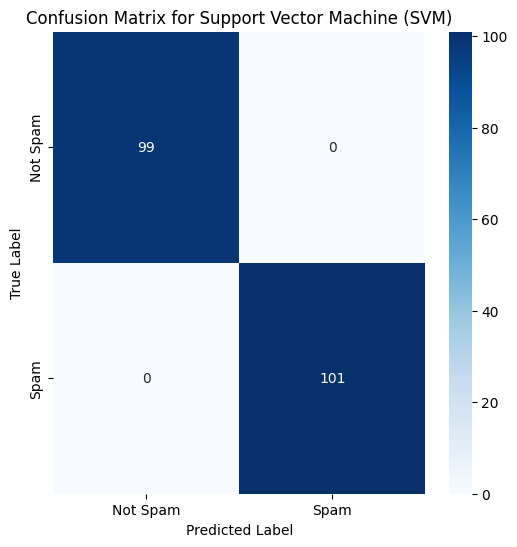

Performance Metrics for Support Vector Machine (SVM):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
False Positive Rate: 0.0000
G-Score: 1.0000


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Initialize and train the Support Vector Machine model
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Predict using the trained model
y_pred_svm = model_svm.predict(X_test)

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Support Vector Machine (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate performance metrics
accuracy_svm = (cm_svm[0,0] + cm_svm[1,1]) / cm_svm.sum()
precision_svm = cm_svm[1,1] / (cm_svm[1,1] + cm_svm[0,1])
recall_svm = cm_svm[1,1] / (cm_svm[1,1] + cm_svm[1,0])
f1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)
false_positive_rate_svm = cm_svm[0,1] / (cm_svm[0,1] + cm_svm[0,0])
g_score_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)  # This is the same as F1 score

# Print metrics
print(f"Performance Metrics for Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"False Positive Rate: {false_positive_rate_svm:.4f}")
print(f"G-Score: {g_score_svm:.4f}")


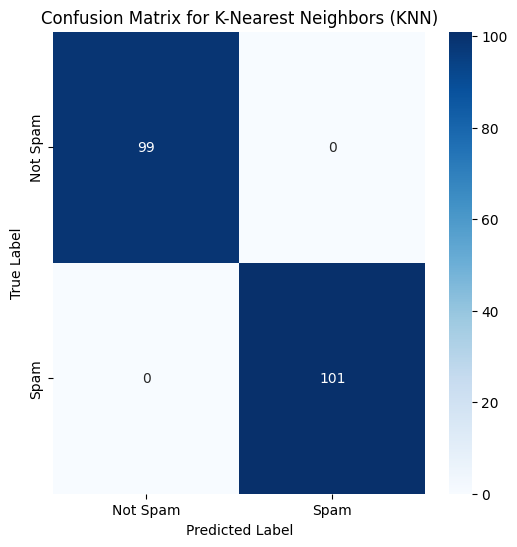

Performance Metrics for K-Nearest Neighbors (KNN):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
False Positive Rate: 0.0000
G-Score: 1.0000


In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-Nearest Neighbors model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Predict using the trained model
y_pred_knn = model_knn.predict(X_test)

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate performance metrics
accuracy_knn = (cm_knn[0,0] + cm_knn[1,1]) / cm_knn.sum()
precision_knn = cm_knn[1,1] / (cm_knn[1,1] + cm_knn[0,1])
recall_knn = cm_knn[1,1] / (cm_knn[1,1] + cm_knn[1,0])
f1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)
false_positive_rate_knn = cm_knn[0,1] / (cm_knn[0,1] + cm_knn[0,0])
g_score_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)  # This is the same as F1 score

# Print metrics
print(f"Performance Metrics for K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"False Positive Rate: {false_positive_rate_knn:.4f}")
print(f"G-Score: {g_score_knn:.4f}")


Model: Logistic Regression
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: Random Forest
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: Naive Bayes
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: SVM
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: KNN
Mean Accuracy: 1.0000
Standard Deviation: 0.0000


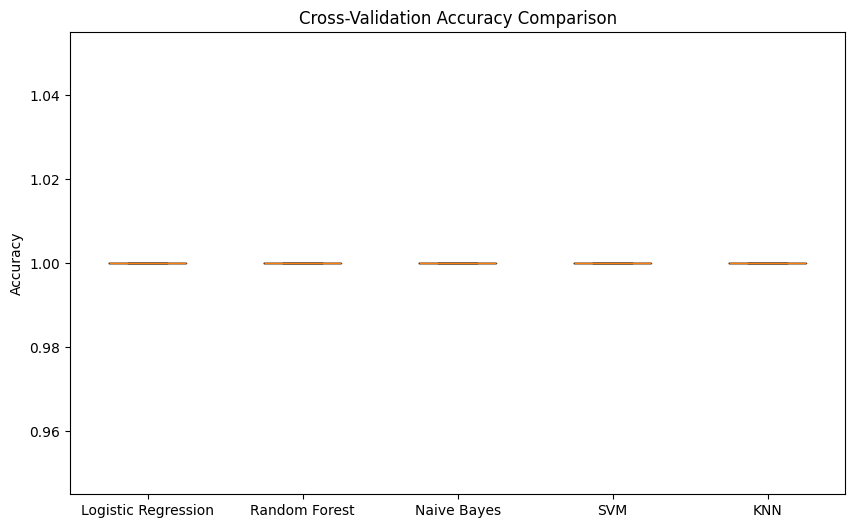

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# If X is a sparse matrix, convert to dense matrix for handling NaN values
if hasattr(X, 'toarray'):  # Check if X is sparse
    X_dense = X.toarray()  # Convert to dense
else:
    X_dense = X  # If it's already dense, just use it

# Replace NaN values with 0 for the dense matrix
X_dense = np.nan_to_num(X_dense)

# Assuming y is a pandas series or numpy array (already in proper format)

# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(kernel='linear')),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through each model and evaluate using cross-validation
for name, model in models:
    cv_scores = cross_val_score(model, X_dense, y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)
    
    # Print the results for each model
    print(f"Model: {name}")
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Standard Deviation: {std_accuracy:.4f}")
    
    # Add the results to a boxplot
    plt.boxplot(cv_scores, positions=[models.index((name, model))], widths=0.5)

# Customize the plot
plt.xticks(range(len(models)), [name for name, _ in models])
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(penalty='l2', C=1.0)  # C controls regularization strength
model_logreg.fit(X_train, y_train)


LogisticRegression()

In [44]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=10, min_samples_split=4, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=4, random_state=42)

In [45]:
from sklearn.svm import SVC
model_svm = SVC(C=1.0, kernel='linear')  # C controls regularization strength
model_svm.fit(X_train, y_train)


SVC(kernel='linear')

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [47]:
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(penalty='l2', C=1.0),
    'Random Forest': RandomForestClassifier(max_depth=10, min_samples_split=4, random_state=42),
    'SVM': SVC(C=1.0, kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Model: {name}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")


Model: Logistic Regression
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: Random Forest
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: SVM
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: KNN
Mean Accuracy: 1.0000
Standard Deviation: 0.0000


In [51]:
# Check for missing values
print(X.isnull().sum())  # If using a DataFrame
print(np.isnan(X).sum())  # If using a numpy array


AttributeError: 'csr_matrix' object has no attribute 'isnull'

In [52]:
# Convert sparse matrix to a dense numpy array
X_dense = X.toarray()

# Check for NaN values
print(np.isnan(X_dense).sum())  # This will give the total count of NaNs


0


In [53]:
# Check for NaN values in a sparse matrix (using np.isnan on sparse matrices)
print(np.isnan(X.data).sum())  # Only checks non-zero entries in the sparse matrix

# If you want to check for missing values in the matrix and treat 0s as missing
# You could do this (assuming zeros should be treated as missing):
print(np.sum(X == 0))  # Counts zeros, which may represent missing values


0
1745465


C:\Users\farei\OneDrive\Documents\h\envs\pythonCYBR520\Lib\site-packages\IPython\core\interactiveshell.py:3577: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
# Efficiently count zeros (assuming zeros represent missing values)
print(np.sum(X == 0))  # This counts all zeros, which might represent missing values


1745465


In [55]:
# Count non-zero elements in the sparse matrix
print(X.count_nonzero())  # Efficient count of non-zero entries


44535


In [56]:
# Convert sparse matrix to dense numpy array and check for NaNs
X_dense = X.toarray()
print(np.isnan(X_dense).sum())  # Check for NaNs in the dense matrix


0


In [58]:
# Convert the sparse matrix to a dense matrix (if using a sparse matrix)
X_dense = X.toarray()

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_dense, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"Model: {name}")
    print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Model: Logistic Regression
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: Random Forest
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: SVM
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: KNN
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
Model: Naive Bayes
Mean Accuracy: 1.0000
Standard Deviation: 0.0000
